In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.config('spark.driver.maxResultSize', '18g').getOrCreate()

In [0]:
path = "dbfs:/mnt/lsde/group05/statistics/submission_sentiment.parquet"

In [0]:
df = spark.read.load(path,format="parquet")

In [0]:
df=df.orderBy('date')

In [0]:
from pyspark.sql import functions as sf

In [0]:
submission_sentiment_daysum = df.groupBy('date').agg(sf.sum('sentiment-counts').alias('sentiment-daysum')).orderBy('date')

In [0]:
submission_sentiment_daysum.show()

+---------+----------------+
 date|sentiment-daysum|
+---------+----------------+
2014-0201| 121|
2014-0202| 132|
2014-0203| 139|
2014-0204| 252|
2014-0205| 380|
2014-0206| 210|
2014-0207| 369|
2014-0208| 318|
2014-0209| 208|
2014-0210| 224|
2014-0211| 211|
2014-0212| 168|
2014-0213| 197|
2014-0214| 159|
2014-0215| 193|
2014-0216| 141|
2014-0217| 145|
2014-0218| 224|
2014-0219| 388|
2014-0220| 526|
+---------+----------------+
only showing top 20 rows

In [0]:
tmp = df.join(submission_sentiment_daysum,"date").select(df.date,"result","sentiment-counts","sentiment-daysum")
overall_submission_sentiment = tmp.withColumn('ratio',100*sf.col("sentiment-counts")/sf.col("sentiment-daysum")).orderBy('date')
overall_submission_sentiment.show()

+---------+--------+----------------+----------------+------------------+
 date| result|sentiment-counts|sentiment-daysum| ratio|
+---------+--------+----------------+----------------+------------------+
2014-0201| joy| 17| 121|14.049586776859504|
2014-0201|surprise| 22| 121|18.181818181818183|
2014-0201| sadness| 24| 121|19.834710743801654|
2014-0201| fear| 58| 121| 47.93388429752066|
2014-0202| fear| 64| 132|48.484848484848484|
2014-0202| sadness| 21| 132|15.909090909090908|
2014-0202| joy| 23| 132|17.424242424242426|
2014-0202|surprise| 24| 132|18.181818181818183|
2014-0203| fear| 65| 139| 46.76258992805755|
2014-0203| joy| 16| 139|11.510791366906474|
2014-0203|surprise| 37| 139|26.618705035971225|
2014-0203| sadness| 21| 139|15.107913669064748|
2014-0204| joy| 21| 252| 8.333333333333334|
2014-0204| sadness| 30| 252|11.904761904761905|
2014-0204| fear| 159| 252|63.095238095238095|
2014-0204|surprise| 42| 252|16.666666666666668|
2014-0205| joy| 25| 380| 6.578947368421052|
2014-0205| fear| 249| 380| 65.52631578947368|
2014-0205|surprise| 71| 380| 18.68421052631579|
2014-0205| sadness| 35| 380| 9.210526315789474|
+---------+--------+----------------+----------------+------------------+
only showing top 20 rows

In [0]:
overall_submission_sentiment_df =overall_submission_sentiment.toPandas()

In [0]:
def handledate(date):
    return date[0:7]+"-"+date[-2:]

In [0]:
overall_submission_sentiment_df['newdate'] = overall_submission_sentiment_df['date'].apply(handledate)

In [0]:
import pandas as pd
import pandas as pd 
import numpy as np
def handledate(date):
    return date[0:7]+"-"+date[-2:]

In [0]:
overall_submission_sentiment_df['date'] = pd.to_datetime(overall_submission_sentiment_df['newdate'])
overall_submission_sentiment_df.set_index("date", inplace=True)

In [0]:
overall_submission_sentiment_df.head()

Out[34]:

,result,sentiment-counts,sentiment-daysum,ratio,newdate
date,,,,,
2014-02-01,fear,58,121,47.933884,2014-02-01
2014-02-01,joy,17,121,14.049587,2014-02-01
2014-02-01,sadness,24,121,19.834711,2014-02-01
2014-02-01,surprise,22,121,18.181818,2014-02-01
2014-02-02,fear,64,132,48.484848,2014-02-02


In [0]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

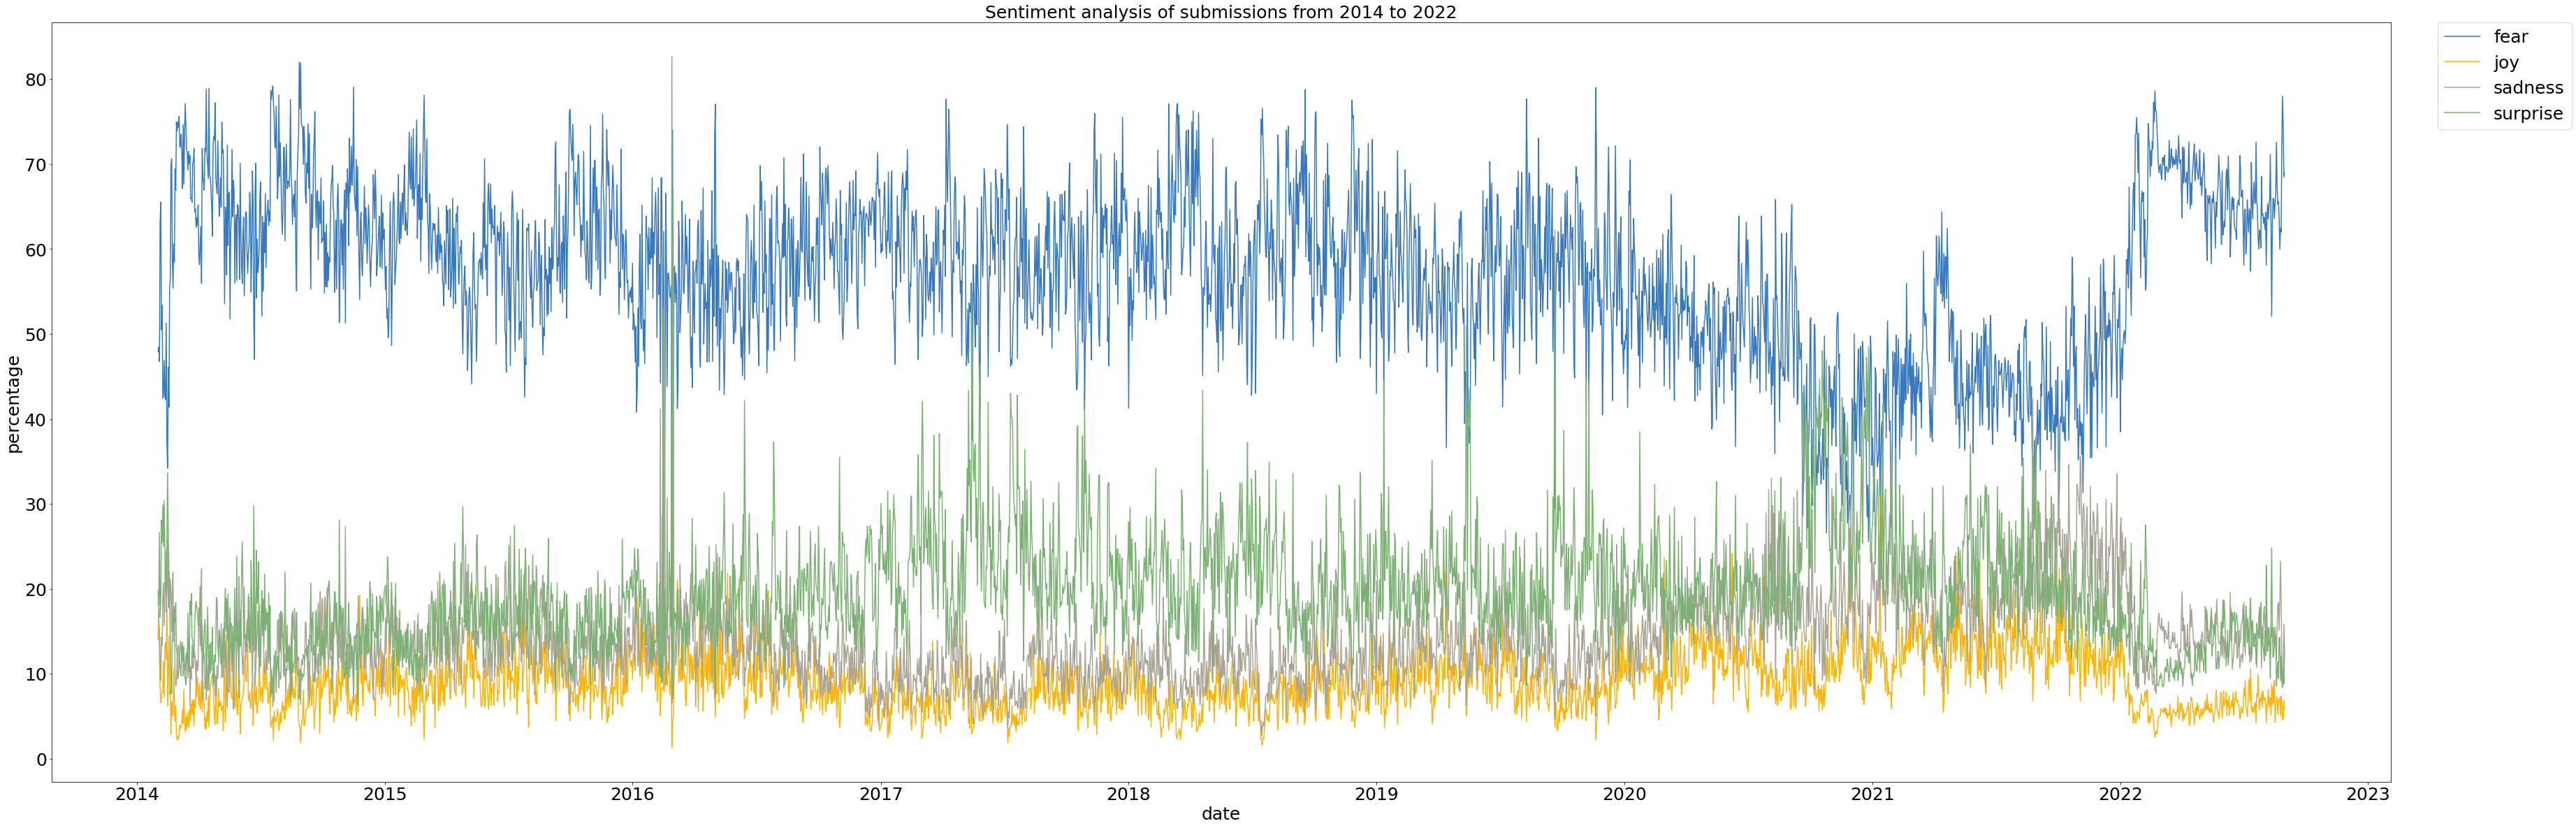

In [0]:
f, ax = plt.subplots(figsize=(60, 20))

#sns.despine(top=True, right=True, left=True, bottom=True)
palette = sns.xkcd_palette(["windows blue", "amber", "greyish", "faded green"])
sns.lineplot(x='date', y='ratio', hue='result', data=overall_submission_sentiment_df,palette = palette)
plt.xticks(size=25)
plt.yticks(size =25)
plt.xlabel('date',size=25)
plt.ylabel('percentage',size=25)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0,fontsize=25)
plt.title('Sentiment analysis of submissions from 2014 to 2022',fontsize=25)
plt.show()

In [0]:
import pandas as pd 
import numpy as np
def handledate(date):
    return date[0:7]+"-"+date[-2:]
